In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import datetime

In [3]:
sales = pd.read_csv('Sales_Data.csv', parse_dates=['transaction timestamp'])

In [4]:
# sales_ori = sales

In [5]:
sales.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'transaction timestamp', 'unit price', 'customer id',
       'transaction country', 'date', 'day_name', 'day_of_month',
       'month_of_year', 'time_of_day(hh:mm:ss)'],
      dtype='object')

In [6]:
sales.rename(index=str, columns={'transaction id': 'transID',
                              'product id' : 'prdtID',
                              'product description' : 'description',
                              'quantity sold' : 'quantity',
                              'transaction timestamp' : 'timestamp',
                              'day_name' : 'day',
                              'day_of_month' : 'day_num',
                              'month_of_year' : 'month',
                              'time_of_day(hh:mm:ss)' : 'time',
                              'unit price' : 'price',
                              'customer id' : 'custID',
                              'transaction country' : 'country'}, inplace=True)

In [7]:
sales.head()

,transID,prdtID,description,quantity,timestamp,price,custID,country,date,day,day_num,month,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00


In [8]:
columns = ['transID', 'custID', 'prdtID', 'description', 'quantity', 'price', 'country', 'timestamp', 'date', 'day', 'day_num', 'month', 'time']

In [9]:
sales.shape

(541909, 13)

In [10]:
len(columns)

13

In [11]:
sales = sales.reindex(columns=columns)

In [12]:
sales.head()

,transID,custID,prdtID,description,quantity,price,country,timestamp,date,day,day_num,month,time
0,536365,17850.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,17850.0,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,17850.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,17850.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,17850.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [13]:
products = sales['description'].unique()
print(len(products))
products

4224


array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [14]:
# convert to lower case
sales['description'] = sales['description'].str.lower()
# remove trailing white spaces
sales['description'] = sales['description'].str.strip()

In [15]:
sales = sales.drop_duplicates()

In [16]:
sales.shape

(536641, 13)

In [17]:
missing_values_count = sales.isnull().sum()
missing_values_count

transID             0
custID         135037
prdtID              0
description      1454
quantity            0
price               0
country             0
timestamp           0
date                0
day                 0
day_num             0
month               0
time                0
dtype: int64

In [18]:
sales.describe()

,custID,quantity,price,day_num
count,401604.000000,536641.000000,536641.000000,536641.000000
mean,15281.160818,9.620029,4.632656,15.024640
std,1714.006089,219.130156,97.233118,8.663351
min,12346.000000,-80995.000000,-11062.060000,1.000000
25%,13939.000000,1.000000,1.250000,7.000000
50%,15145.000000,3.000000,2.080000,15.000000
75%,16784.000000,10.000000,4.130000,22.000000
max,18287.000000,80995.000000,38970.000000,31.000000


In [19]:
sales_neg_quan = sales[sales.quantity < 0]
sales_neg_price = sales[sales.price < 0]

free = sales[sales.price == 0]
nosale = sales[sales.quantity == 0]

sales = sales[sales.quantity > 0]
sales = sales[sales.price > 0]

In [20]:
sales.shape

(524878, 13)

In [21]:
sales.describe()

,custID,quantity,price,day_num
count,392692.000000,524878.000000,524878.000000,524878.000000
mean,15287.843865,10.616600,3.922573,15.022472
std,1713.539549,156.280031,36.093028,8.660738
min,12346.000000,1.000000,0.001000,1.000000
25%,13955.000000,1.000000,1.250000,7.000000
50%,15150.000000,4.000000,2.080000,15.000000
75%,16791.000000,11.000000,4.130000,22.000000
max,18287.000000,80995.000000,13541.330000,31.000000


In [62]:
sales['price'].max()

13541.33

In [22]:
len(sales['prdtID'].unique())

3922

In [23]:
len(sales['custID'].unique())

4339

In [24]:
len(sales['transID'].unique())

19960

In [66]:
# most sold product
x = sales.groupby(['prdtID']).sum().sort_values('quantity', ascending=False).head(5)
x = x[['prdtID','quantity']]

,custID,quantity,price,day_num,total_price
prdtID,,,,,
23843,16446.0,80995,2.08,9,168469.60
23166,3047321.0,78033,367.12,4012,81700.92
22197,16366320.0,56898,1479.76,21115,51334.47
84077,7213288.0,54951,171.91,8054,13814.01
85099B,24700699.0,48371,5243.39,31598,94159.81


In [26]:
sales['total_price'] = sales['price'] * sales['quantity']
sales.head()

,transID,custID,prdtID,description,quantity,price,country,timestamp,date,day,day_num,month,time,total_price
0,536365,17850.0,85123A,white hanging heart t-light holder,6,2.55,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,15.30
1,536365,17850.0,71053,white metal lantern,6,3.39,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,20.34
2,536365,17850.0,84406B,cream cupid hearts coat hanger,8,2.75,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,22.00
3,536365,17850.0,84029G,knitted union flag hot water bottle,6,3.39,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,20.34
4,536365,17850.0,84029E,red woolly hottie white heart.,6,3.39,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,20.34


In [64]:
sales.shape

(524878, 16)

In [27]:
sales['total_price'].describe()

count    524878.000000
mean         20.275399
std         271.693566
min           0.001000
25%           3.900000
50%           9.920000
75%          17.700000
max      168469.600000
Name: total_price, dtype: float64

In [28]:
# which product has highest total price
sales.groupby('prdtID').sum().sort_values('total_price', ascending=False).head(10)

,custID,quantity,price,day_num,total_price
prdtID,,,,,
DOT,225536.0,706,206248.77,10864,206248.77
22423,25637419.0,13851,28065.76,29824,174156.54
23843,16446.0,80995,2.08,9,168469.60
85123A,31482068.0,37641,7024.49,33249,104462.75
47566,21362286.0,18283,9850.68,26085,99445.23
85099B,24700699.0,48371,5243.39,31598,94159.81
23166,3047321.0,78033,367.12,4012,81700.92
POST,14015033.0,3150,34992.23,17586,78101.88
M,4302563.0,6984,74098.73,4566,77750.27


In [29]:
# which country sold most
sales.groupby('country').sum().sort_values('total_price', ascending=False)['total_price'].head(5)

country
United Kingdom    9.001744e+06
Netherlands       2.854463e+05
EIRE              2.831405e+05
Germany           2.286784e+05
France            2.096254e+05
Name: total_price, dtype: float64

In [56]:
# which country sold most
sales.groupby('country').sum().sort_values('quantity', ascending=False)['quantity'].head(5)

country
United Kingdom    4646906
Netherlands        200361
EIRE               147007
Germany            119154
France             112060
Name: quantity, dtype: int64

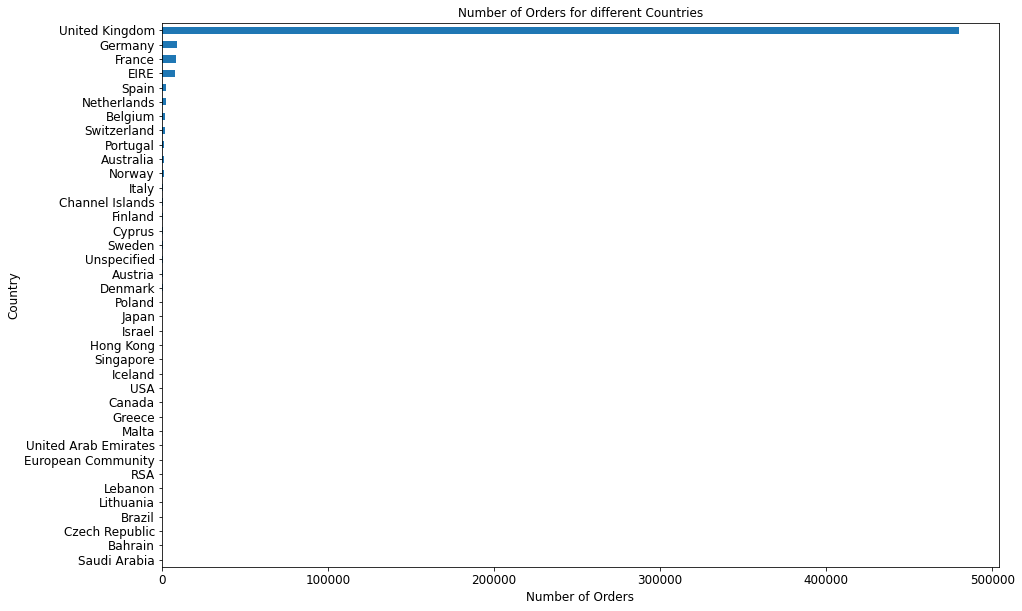

In [59]:
countrydf = sales.groupby('country')['transID'].count().sort_values()

plt.subplots(figsize=(15,10))
countrydf.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

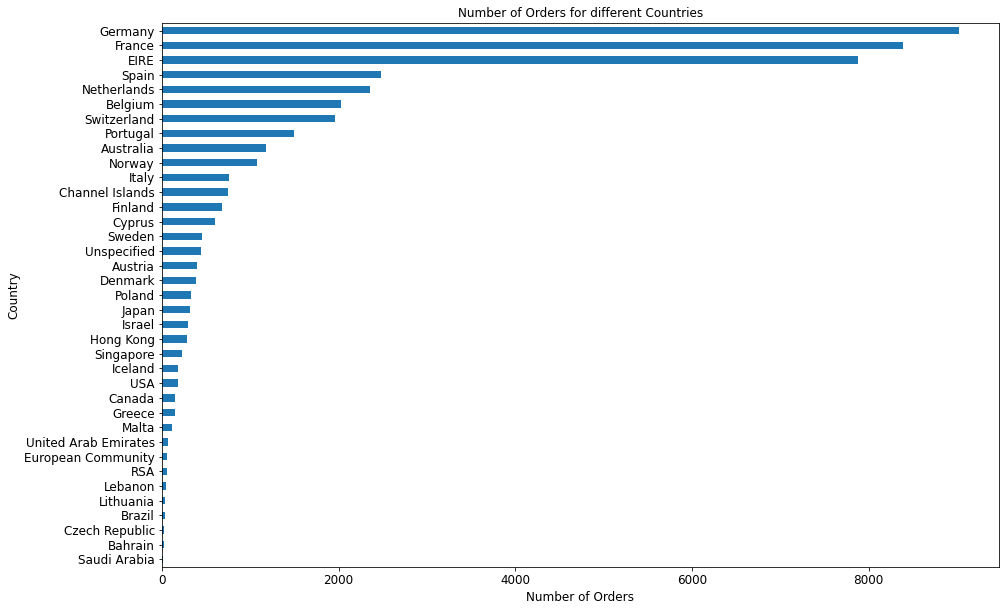

In [60]:
del countrydf['United Kingdom']

plt.subplots(figsize=(15,10))
countrydf.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [63]:
countrydf

country
Saudi Arabia               9
Bahrain                   18
Czech Republic            25
Brazil                    32
Lithuania                 35
Lebanon                   45
RSA                       57
European Community        60
United Arab Emirates      68
Malta                    112
Greece                   145
Canada                   151
USA                      179
Iceland                  182
Singapore                222
Hong Kong                280
Israel                   292
Japan                    321
Poland                   330
Denmark                  380
Austria                  398
Unspecified              442
Sweden                   450
Cyprus                   603
Finland                  685
Channel Islands          747
Italy                    758
Norway                  1071
Australia               1181
Portugal                1492
Switzerland             1958
Belgium                 2031
Netherlands             2359
Spain                   2479
EIRE  

In [32]:
sales.sort_values('total_price', ascending=False)['total_price'].head(5)

540421    168469.60
61619      77183.60
222680     38970.00
15017      13541.33
299982     11062.06
Name: total_price, dtype: float64

In [33]:
# top numbers of transcations made by customers
sales.groupby(by=['custID','country'], as_index=False)['transID'].count().head()

,custID,country,transID
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


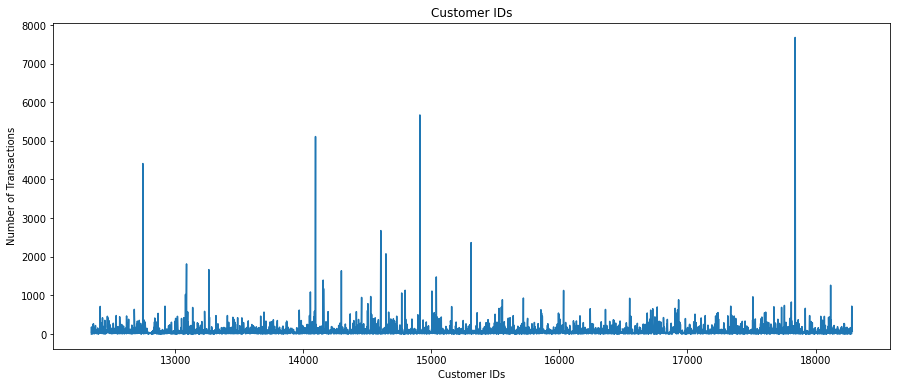

In [34]:
transactions = sales.groupby(by=['custID','country'], as_index=False)['transID'].count()

plt.subplots(figsize=(15,6))
plt.plot(transactions.custID, transactions.transID)
plt.xlabel('Customer IDs')
plt.ylabel('Number of Transactions')
plt.title('Customer IDs')
plt.show()

In [35]:
# Top customers by most number of transactions
transactions.sort_values(by='transID', ascending=False).head(10)

,custID,country,transID
4018,17841.0,United Kingdom,7676
1887,14911.0,EIRE,5670
1297,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4412
1669,14606.0,United Kingdom,2677
2184,15311.0,United Kingdom,2366
1697,14646.0,Netherlands,2076
570,13089.0,United Kingdom,1814
698,13263.0,United Kingdom,1667
1442,14298.0,United Kingdom,1637


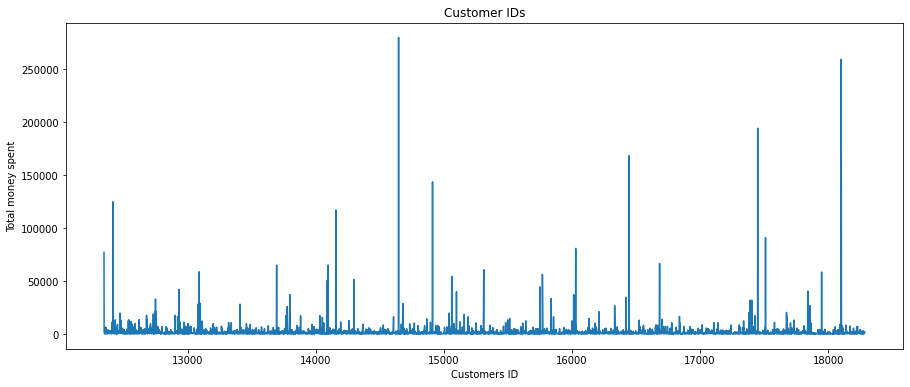

In [36]:
# top customers by money spent
max_total_price = sales.groupby(by=['custID','country'], as_index=False)['total_price'].sum()

plt.subplots(figsize=(15,6))
plt.plot(max_total_price.custID, max_total_price.total_price)
plt.xlabel('Customers ID')
plt.ylabel('Total money spent')
plt.title('Customer IDs')
plt.show()

In [37]:
# Top customers by by money spent
max_total_price.sort_values(by='total_price', ascending=False).head(10)

,custID,country,total_price
1697,14646.0,Netherlands,280206.02
4209,18102.0,United Kingdom,259657.30
3736,17450.0,United Kingdom,194390.79
3016,16446.0,United Kingdom,168472.50
1887,14911.0,EIRE,143711.17
57,12415.0,Australia,124914.53
1341,14156.0,EIRE,117210.08
3779,17511.0,United Kingdom,91062.38
2710,16029.0,United Kingdom,80850.84
0,12346.0,United Kingdom,77183.60


In [38]:
max(sales['timestamp'])

Timestamp('2011-12-09 12:50:00')

In [39]:
min(sales['timestamp'])

Timestamp('2010-12-01 08:26:00')

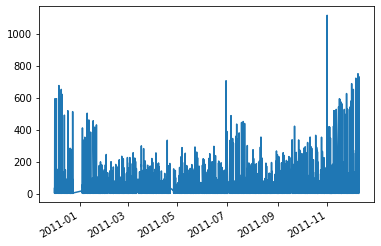

In [40]:
sales['timestamp'].value_counts().sort_values().plot.line()

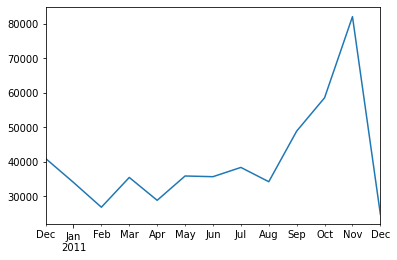

In [41]:
sales['timestamp'].value_counts().resample('M').sum().plot.line()

In [42]:
sales_neg_quan

,transID,custID,prdtID,description,quantity,price,country,timestamp,date,day,day_num,month,time
141,C536379,14527.0,D,discount,-1,27.50,United Kingdom,2010-12-01 09:41:00,2010-12-01,Wednesday,1,December,09:41:00
154,C536383,15311.0,35004C,set of 3 coloured flying ducks,-1,4.65,United Kingdom,2010-12-01 09:49:00,2010-12-01,Wednesday,1,December,09:49:00
235,C536391,17548.0,22556,plasters in tin circus parade,-12,1.65,United Kingdom,2010-12-01 10:24:00,2010-12-01,Wednesday,1,December,10:24:00
236,C536391,17548.0,21984,pack of 12 pink paisley tissues,-24,0.29,United Kingdom,2010-12-01 10:24:00,2010-12-01,Wednesday,1,December,10:24:00
237,C536391,17548.0,21983,pack of 12 blue paisley tissues,-24,0.29,United Kingdom,2010-12-01 10:24:00,2010-12-01,Wednesday,1,December,10:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,14397.0,23144,zinc t-light holder stars small,-11,0.83,United Kingdom,2011-12-09 09:57:00,2011-12-09,Friday,9,December,09:57:00
541541,C581499,15498.0,M,manual,-1,224.69,United Kingdom,2011-12-09 10:28:00,2011-12-09,Friday,9,December,10:28:00
541715,C581568,15311.0,21258,victorian sewing box large,-5,10.95,United Kingdom,2011-12-09 11:57:00,2011-12-09,Friday,9,December,11:57:00
541716,C581569,17315.0,84978,hanging heart jar t-light holder,-1,1.25,United Kingdom,2011-12-09 11:58:00,2011-12-09,Friday,9,December,11:58:00


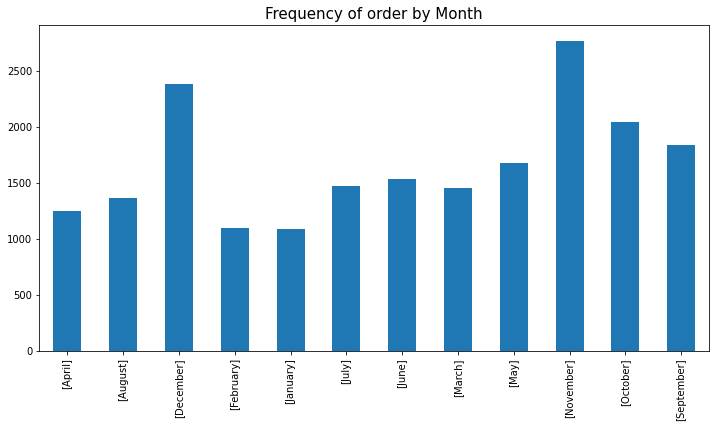

In [43]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
transaction_date = sales.groupby(['transID'])['month'].unique()
transaction_date.value_counts().sort_index().plot.bar()

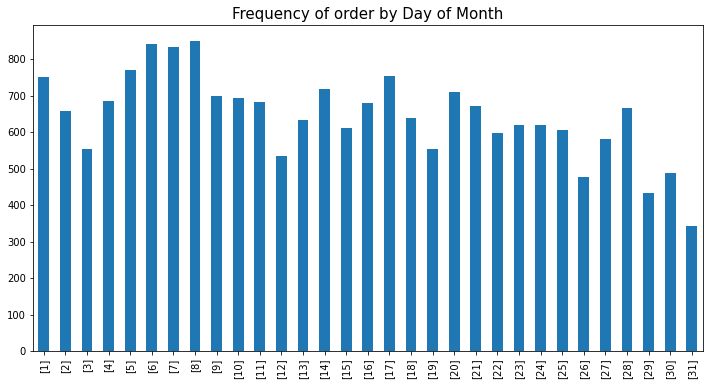

In [44]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day of Month", fontsize=15)
transaction_date = sales.groupby(['transID'])['day_num'].unique()
transaction_date.value_counts().sort_index().plot.bar()

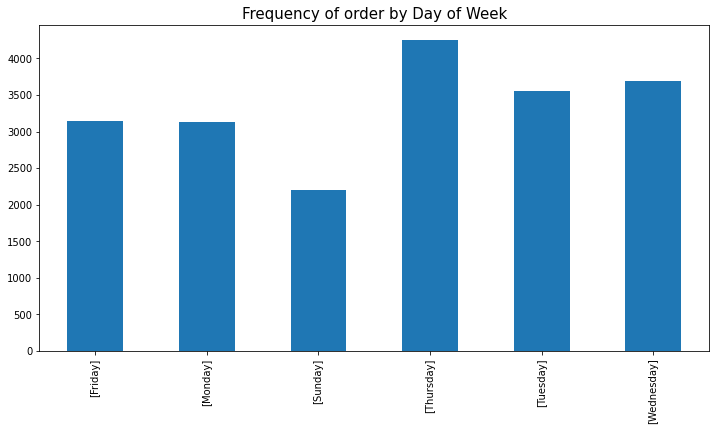

In [45]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day of Week", fontsize=15)
transaction_date = sales.groupby(['transID'])['day'].unique()
transaction_date.value_counts().sort_index().plot.bar()

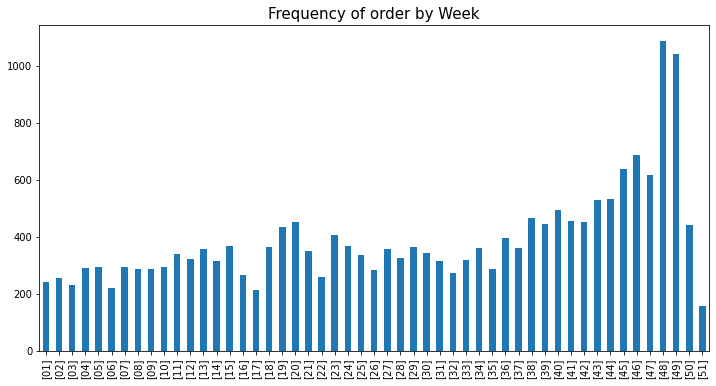

In [46]:
sales['week'] = sales['timestamp'].apply(lambda x: x.strftime('%W'))

plt.figure(figsize=(12,6))
plt.title("Frequency of order by Week", fontsize=15)
InvoiceDate = sales.groupby(['transID'])['week'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

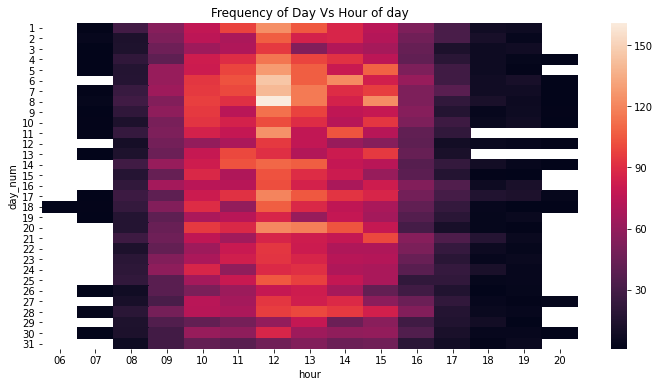

In [47]:
sales['hour'] = sales['timestamp'].apply(lambda x: x.strftime('%H'))

timedf  = sales.groupby(['day_num', 'hour'])['transID'].unique().reset_index()
timedf['transID'] = timedf['transID'].apply(len)

timedf = timedf.pivot('day_num', 'hour', 'transID')

plt.figure(figsize=(12,6))
sns.heatmap(timedf)
plt.title("Frequency of Day Vs Hour of day")
plt.show()

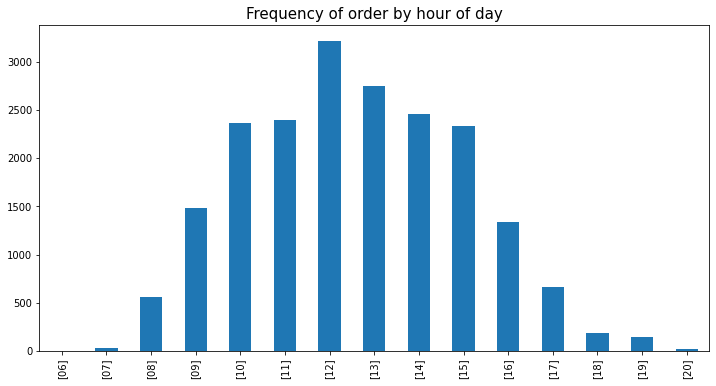

In [48]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by hour of day", fontsize=15)
transaction_date = sales.groupby(['transID'])['hour'].unique()
(transaction_date.value_counts()).iloc[0:-1].sort_index().plot.bar()

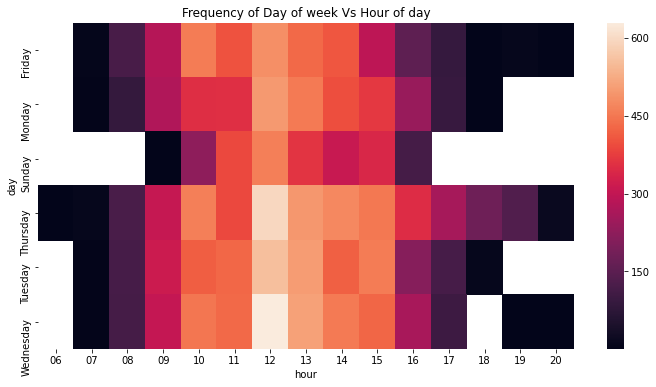

In [49]:
grouped_df  = sales.groupby(['day', 'hour'])['transID'].unique().reset_index()
grouped_df['transID'] = grouped_df['transID'].apply(len)

#grouped_df = df.groupby(["Weekday", "hour"])["InvoiceNo"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('day', 'hour', 'transID')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

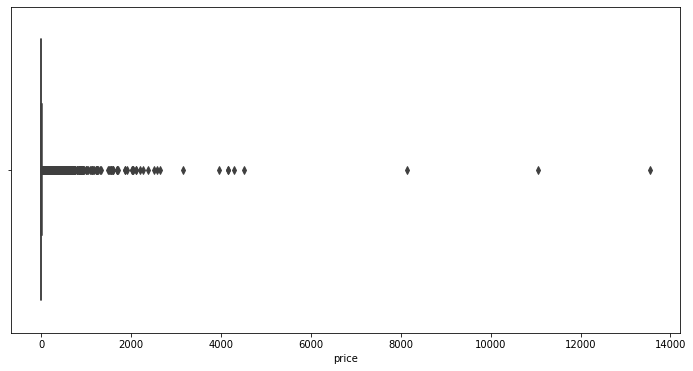

In [50]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(sales.price)
plt.show()

In [51]:
free.month.value_counts()

December     325
November     266
April        261
March        246
May          244
October      238
July         188
June         184
September    160
January      140
August       131
February     127
Name: month, dtype: int64

In [52]:
free.shape

(2510, 13)

In [53]:
ax = free.month.value_counts().sort_index().plot('bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.